# Assignment8 
### Siyi Fan

## Part1

### Question1

In [375]:
# Previewing the data after removing non-numeric variable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("college.csv")
df.Private.replace(('Yes', 'No'), (1, 0), inplace=True)
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660.0,1232.0,721.0,23.0,52.0,2885.0,537.0,7440.0,3300.0,450.0,2200.0,70.0,78.0,18.1,12.0,7041.0,60.0
1,1,2186.0,1924.0,512.0,16.0,29.0,2683.0,1227.0,12280.0,6450.0,750.0,1500.0,29.0,30.0,12.2,16.0,10527.0,56.0
2,1,1428.0,1097.0,336.0,22.0,50.0,1036.0,99.0,11250.0,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0
3,1,417.0,349.0,137.0,60.0,89.0,510.0,63.0,12960.0,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,19016.0,59.0
4,1,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,4120.0,800.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.0


In [376]:
# Perform PCA analysis
from sklearn.decomposition import PCA
pca = PCA(2)
college_pca = pca.fit(df).transform(df)
college_pca

array([[ -2551.83783727,  -3445.94721665],
       [  -743.72956064,   2227.36355805],
       [ -3373.55622543,    674.25246151],
       ..., 
       [ -1838.20683109,  -2662.64945636],
       [ 15023.18634781,  27968.56100798],
       [ -2286.58217384,  -6915.50729917]])

In [377]:
# The first two principal components
comp_p=pd.DataFrame(pca.components_.T, index = df.columns, columns = ['PC1', 'PC2'])
comp_p

,PC1,PC2
Private,-0.000031,0.000040
Apps,0.557026,-0.039361
Accept,0.347712,-0.077162
Enroll,0.129854,-0.045413
Top10perc,0.001025,0.001706
Top25perc,0.001177,0.001497
F.Undergrad,0.670614,-0.283672
P.Undergrad,0.111113,-0.080380
Outstate,0.054842,0.569323
Room.Board,0.028866,0.105991


Text(0.5,1,'First two principal components')

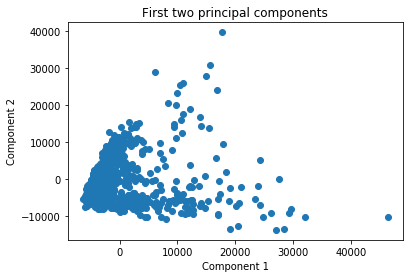

In [378]:
c_p = pd.DataFrame(college_pca, columns = ['PC1', 'PC2'])
plt.scatter(x = c_p['PC1'], y = c_p['PC2'])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('First two principal components')

Text(0,0.5,'Component 2')

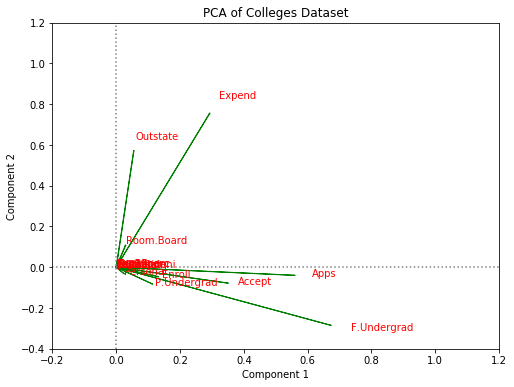

In [379]:
# Plot the first two principal components
%matplotlib inline
fig,ax  = plt.subplots(figsize=(8,6))
xmin = -0.2
xmax = 1.2
ymin = -0.4
ymax = 1.2
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.hlines(0,xmin,xmax,linestyles='dotted',colors = 'grey')
ax.vlines(0,ymin,ymax,linestyles='dotted',colors = 'grey')

# Plot arrows:
for i in range(len(df.columns)):
    plt.arrow(0, 0, comp_p.PC1[i], comp_p.PC2[i], color="green")

# Plot arrow labels:
for i in comp_p[:].index:
    ax.annotate(i, (comp_p.PC1.loc[i] * 1.1, comp_p.PC2.loc[i] * 1.1), color='red')

ax.set_title('PCA of Colleges Dataset')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

Based on the plot above, 'Apps', 'Accept', 'Enroll','F.Undergrad' and 'p.Undergrad' are most correlated with the first principal component.'Expend', 'Room.Board', and 'Outstate' seem to be strongly correlated with the second principal component.

### Question2 

In [380]:
# Percentage of variance explained for components
print(f'The first two components explain {round(pca.explained_variance_ratio_[:2].sum()*100,2)}% of the variance.')

The first two components explain 87.08% of the variance.


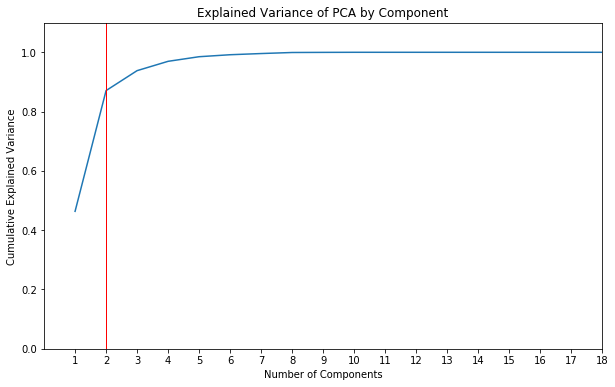

In [381]:
pca_all = PCA().fit(df)
plt.figure(figsize = (10,6))
plt.plot(list(range(1, len(df.columns) + 1)), np.cumsum(pca_all.explained_variance_ratio_))
plt.title("Explained Variance of PCA by Component")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.xlim(0, 18)
plt.ylim(0, 1.1)
plt.xticks(list(range(1, len(df.columns) + 1)))
plt.axvline(x=2, linewidth=1, color = 'red')
plt.show()

## Part2

### Question1: Perform PCA on the dataset and plot the observations on the first and second principal components.

In [382]:
df = pd.read_csv("USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [383]:
# Perform PCA analysis
pca = PCA(2)
USArrests_pca = pca.fit(df).transform(df)
A_p = pd.DataFrame(USArrests_pca, index = df.index, columns=["PC1", "PC2"])
A_p.head()

,PC1,PC2
State,,
Alabama,64.802164,11.448007
Alaska,92.827450,17.982943
Arizona,124.068216,-8.830403
Arkansas,18.340035,16.703911
California,107.422953,-22.520070


In [384]:
# The first two principal components
comp_p=pd.DataFrame(pca.components_.T, index = df.columns, columns = ['PC1', 'PC2'])
comp_p

,PC1,PC2
Murder,0.041704,0.044822
Assault,0.995221,0.058760
UrbanPop,0.046336,-0.976857
Rape,0.075156,-0.200718


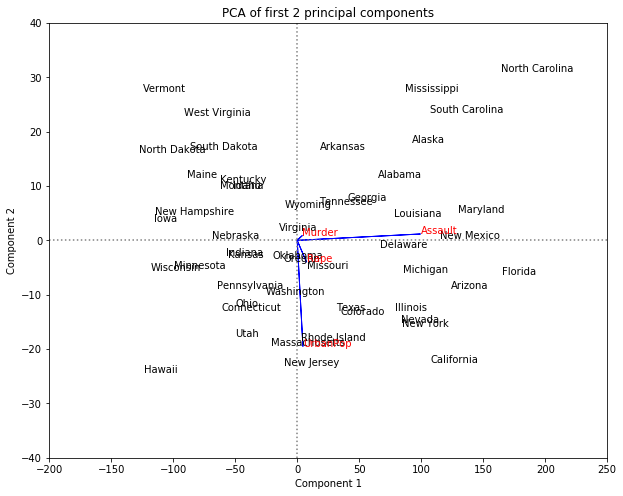

In [385]:
# plot the observations on the first and second principal components
%matplotlib inline
fig,ax  = plt.subplots(figsize=(10,8))
xmin = -200
xmax = 250
ymin = -40
ymax = 40
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.hlines(0,xmin,xmax,linestyles='dotted',colors = 'grey')
ax.vlines(0,ymin,ymax,linestyles='dotted',colors = 'grey')

for i in A_p[:].index:
    ax.annotate(i, (A_p.PC1.loc[i], A_p.PC2.loc[i]), color= 'black')

for i in range(len(df.columns)):
    x = comp_p.iloc[i, 0]
    y = comp_p.iloc[i, 1]
    # Plot arrows:
    plt.arrow(0, 0, x*100, y*20, color="blue")
    # Plot arrow labels:
    plt.text(x*100, y*20, comp_p.index[i], color="red")
    
plt.title('PCA of first 2 principal components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

### Question2 Perform $K$-means clustering with $K=2$. 

In [386]:
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hr

Text(0.5,1,'Clustering K = 2')

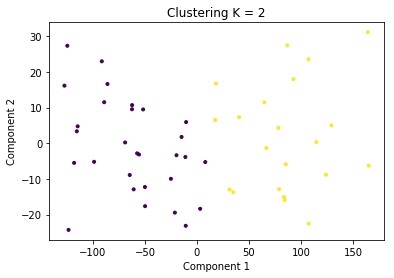

In [387]:
km2 = KMeans(2, n_init=20).fit(df)
clusters = km2.labels_
plt.scatter(A_p.PC1, A_p.PC2, marker = '.', c = clusters)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Clustering K = 2')

When K=2, the data will be divided into two clusters. In one cluster, most states are positively correlated with the first component, and in the other cluster, most states are negatively correlated with the first component. However, the second component also plays a role on this variation. States lying on the vertical line of 0 are weakly correlated with the first component, but the two yellow dots are still stronger than the two purple dots. Therefore, when the correlations of some states with the first component are weak, other components may give a hand on classification.

### Question3 Perform $K$-means clustering with $K=4$. 

Text(0.5,1,'Clustering K = 4')

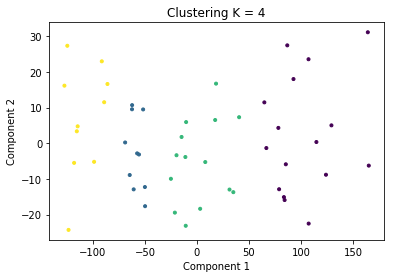

In [388]:
km4 = KMeans(4, n_init=20).fit(df)
clusters = km4.labels_
plt.scatter(A_p.PC1, A_p.PC2, marker = '.', c = clusters)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Clustering K = 4')

When K=4, the data will be divided into four clusters. For cluster1, most states are strongly positively correlated with the first component. For cluster4, most states are strongly negatively correlated with the first component. Same with the situation of K=2, the first component has the primary effect on classification of data. However, there are some ambiguous points, that is, some outliers show up when K=4, particularly in the cluster2, 3, and 4. For example, three purple points (most close to green points) which seem to be in the cluster3 (green points) are included in the cluster4. The reason behind this could be the influence of component2. That is, the second component is still helping to make a difference on classifications. 

### Question4 Perform $K$-means clustering with $K=3$. 

Text(0.5,1,'Clustering K = 3')

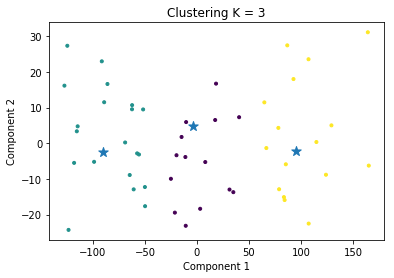

In [389]:
km3 = KMeans(3, n_init=20).fit(df)
clusters = km3.labels_
plt.scatter(A_p.PC1, A_p.PC2, marker = '.', c = clusters)
plt.scatter(pca.fit_transform(km3.cluster_centers_)[:,0], pca.fit_transform(km3.cluster_centers_)[:,1], marker='*', s=100)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Clustering K = 3')

When K=3, the data will be divided into three clusters. compared to the situations of K=2 and K=4, the number of outliers are in the middle position, because there are still some ambiguous points. It also suggests that the second component has an impact on the classification, but its influence gets smaller when K becomes smaller. 

### Question5 Perform $K$-means clustering with $K=3$ on the first two principal components score vectors.

Text(0.5,1,'Clustering score vectors K = 3')

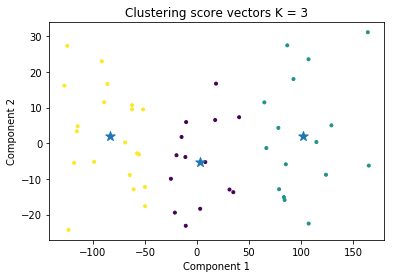

In [390]:
km_3 = KMeans(3, n_init=20).fit(A_p)
clusters = km_3.labels_
plt.scatter(A_p.PC1, A_p.PC2, marker = '.', c = clusters)
plt.scatter(km_3.cluster_centers_[:,0], km_3.cluster_centers_[:,1], marker='*', s=100)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Clustering score vectors K = 3')

Compared to Question4 using raw data, the results are silimilar, however, this plot has a much clear categorical boundaries. As we can see, the three centers change their location after using raw data and it shows that the scatters are more equally distribued around the centroid in each cluster. The reason behind this could be the dimensions of data. The raw data has four dimensions projected on two components, while the clustering on the first two components uses the same two dimensional space. 

### Question6 Cluster the states.

Text(0.5,1,'Hierarchical clustering')

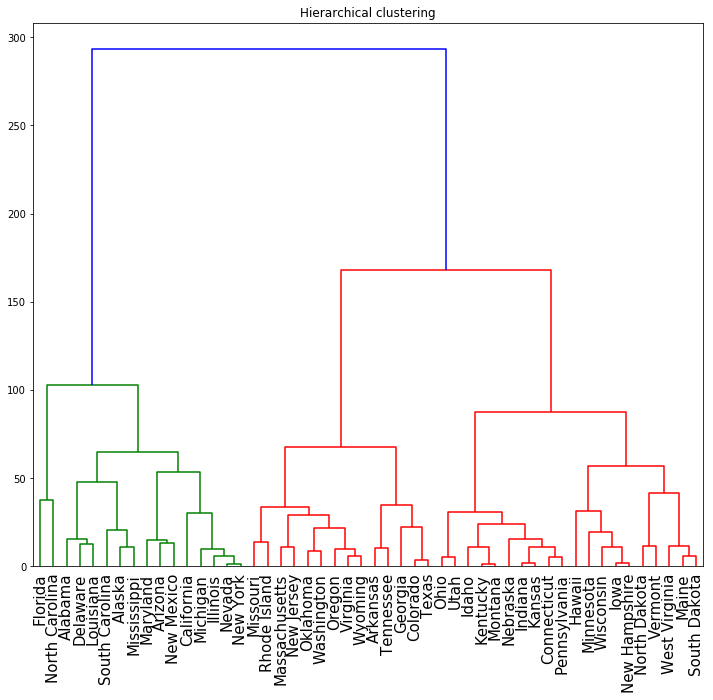

In [391]:
plt.figure(figsize = (12,10))
hr.dendrogram(hr.complete(A_p), labels = A_p.index, leaf_font_size = 15)
plt.title("Hierarchical clustering")

### Question7 Cut the dendrogram at a height that results in three distinct clusters.

Text(0.5,1,'Hierarchical 3 clusters')

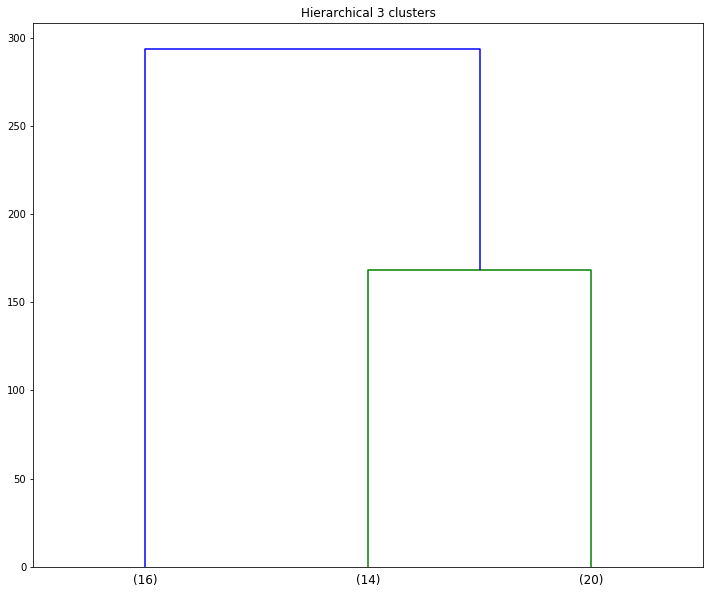

In [392]:
plt.figure(figsize = (12,10))
hr.dendrogram(hr.complete(A_p), truncate_mode='lastp', p=3, labels = A_p.index)
plt.title("Hierarchical 3 clusters")

The states in cluster 1 are Alabama, Alaska, Arizona, California, Delaware, Florida, Illinois, Louisiana, Maryland, Michigan, Mississippi, Nevada, New Mexico, New York, North Carolina, South Carolina.

The states in cluster 2 are Arkansas, Colorado, Georgia, Massachusetts, Missouri, New Jersey, Oklahoma, Oregon, Rhode Island, Tennessee, Texas, Virginia, Washington, Wyoming.

The states in cluster 3 are Connecticut, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Minnesota, Montana, Nebraska, New Hampshire, North Dakota, Ohio, Pennsylvania, South Dakota, Utah, Vermont, West Virginia, Wisconsin.


### Question8 What effect does scaling the variables have on the hierarchical clustering obtained?

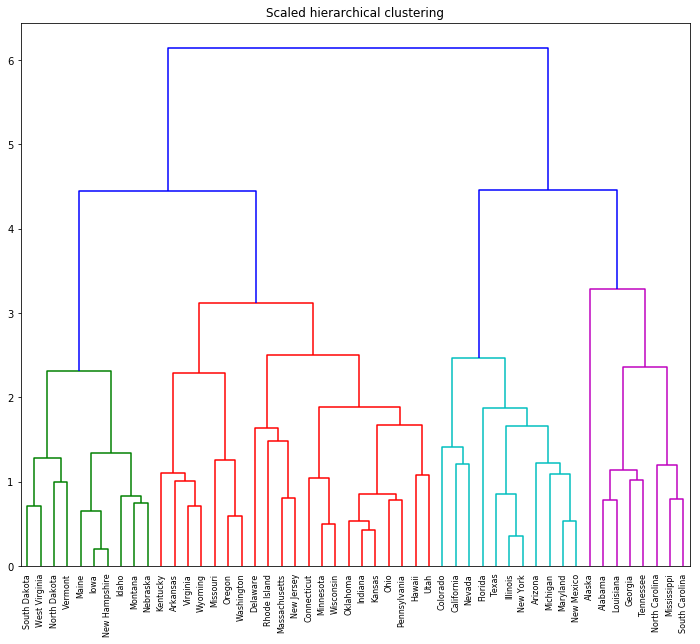

In [393]:
from sklearn.preprocessing import scale
plt.figure(figsize = (12,10))
A_p_scaled = pd.DataFrame(scale(df), index = df.index, columns= df.columns)
hr.dendrogram(hr.complete(A_p_scaled), labels = A_p.index)
plt.title("Scaled hierarchical clustering")
plt.show()

Text(0.5,1,'Hierarchical 3 clusters')

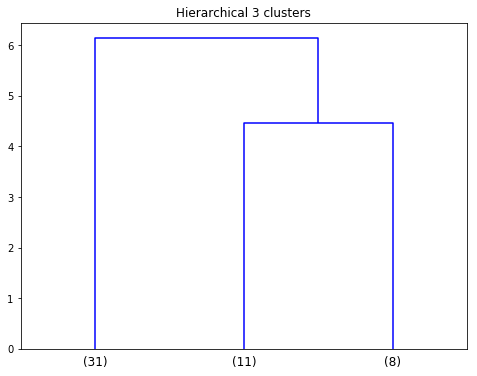

In [394]:
plt.figure(figsize = (8,6))
hr.dendrogram(hr.complete(A_p_scaled), truncate_mode='lastp', p=3, labels = A_p.index)
plt.title("Hierarchical 3 clusters")

After scaling data, the hierarchical clustering changes a lot. Obviously, the distance becomes closer. Before scaling, there are three clusters, but after scaling, there are four clusters. By cutting the dendrogram, we can also see the difference. Before scaling, states are divided into three clusters, with nearly equal group size (16,14,20), while after scaling, the differences between three group sizes change a lot (31,11,8). It means that some states change their clusters after being scaled. 

Because of standardization, the differences between states shrink which makes it harder to put them into a cluster. The reason behind this is standardization will reduce the orginal value by dividing a standard deviation, say changing 100 to 1. There is no doubt to say the difference between 100 and 80 is significant, however, it is hard to decide whether the difference between 1 and 0.8 is significant. In this way, Murder=100 and Murder=80 may belong to different clusters, while Murder_SD=1 and Murder_SD=0.8 may belong to the same cluster. 

Euclidean distance is a good choice for some properly scaled data, because standardization helps to normalize the weight of each variable which finally makes data more comparable. However, the downside is that when analyzing big irrelevant data, the distance between two close points within one cluster is the same as between two remote points from different clusters, which makes data less easier to distinguish. 